<center><h1> Data Analysis

Data Science, at it's core, is the process of analyzing data (about something) in order to:
- Classifying the data in meaningful ways
- Make predictions about future data
- Discover new knowledge about the data and the phenomena they represent.

In [1]:
%matplotlib inline

# Import matplotlib and numpy for some quick examples
import matplotlib.pyplot as plt
import numpy as np

<center><h1> Prediction </h1></center>
<br>
<div class="alert alert-success">
Prediction is the use of current (training) data to make predictions about future observations.
</div>
<br>
<div class="alert alert-info">
Optional reading on [prediction in data science](https://www.archive.nyu.edu/bitstream/2451/31635/2/data_science_and_prediction_dhar.pdf).
</div>

### Problem
Let's say we wanted to predict dogs weight, from their length. Maybe, for example, it's easier to use a tape measure than to get a dog onto a scale, so if we could infer their weight from their length, we could save a lot of time. 

In [2]:
# We have some data
lengths = [75, 50, 90, 115]    # cm's
weights = [17.5, 10, 18, 20]   # kg's

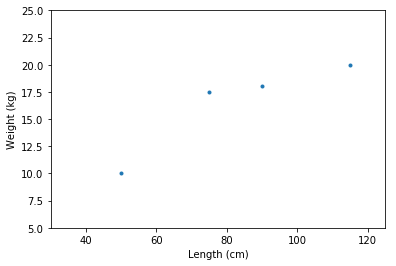

In [3]:
# Plot the data: Always visualize your data!
f, ax = plt.subplots()
ax.plot(lengths, weights , '.')
plt.xlabel('Length (cm)'); plt.xlim([30, 125]);
plt.ylabel('Weight (kg)'); plt.ylim([5, 25]);

In [4]:
# Polyfit (degree=1) will fit a linear fit to the data, of the form y = ax + b
#  Once we fit this simple model to the data, we can use it to predict from new data points
a, b = np.polyfit(lengths, weights, 1)

In [5]:
# So now we can predict the weight of a new observation (a new dog)
new_length = 62
pred_weight = a * new_length + b 
print('Predicted weight for a new data point, weight  is', pred_weight)

Predicted weight for a new data point, weight  is 13.3460674157


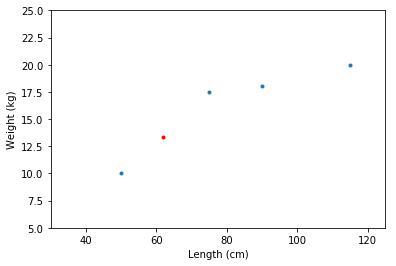

In [6]:
# We can check how our prediction fits in with the data we observed
ax.plot(new_length, pred_weight, '.r')
f

In [7]:
# If we also happen to now the true weight of our test data, we can check how good our prediction is
actual_weight = 14.7
error = actual_weight - pred_weight

print('The (absolute) error of our prediction is', str(error), 'kg\'s.')

The (absolute) error of our prediction is 1.35393258427 kg's.


How we go about making predictions gets more complicated, as we deal with large, messy data with more variables of various 'shapes'. Fundamentally, though, it comes down to the same process: what can we learn from a set of data, such that, given a new peice of data, we can make predictions about it (and using test data with known answers to evaluate how good our predictive models are). 
<hr>

<center><h1> Classification </h1></center>
<br>
<div class="alert alert-success">
Classification (or clustering) is the process of trying to discover a systematic organization of data. 
</div>
<br>
<div class="alert alert-info">
Classification overview from wikipedia: https://en.wikipedia.org/wiki/Statistical_classification
</div>

### Problem
Our local zoologist is investigating a group of squirrels. She would like to know how many different species there are present in the population, but only has basic data to work with. We can try and cluster the data we have, and look for (what look like) meaningful groupings. 

In [8]:
# We observe a bunch of squirrels with [height (cm), weight (grams)] pairs
dat = np.array([[10., 600.], [16., 1200], [6., 800], [12., 700.], [17., 1400.],
               [8., 500.], [20., 1500.], [21., 1300.], [11., 800.], [18., 1100.]])

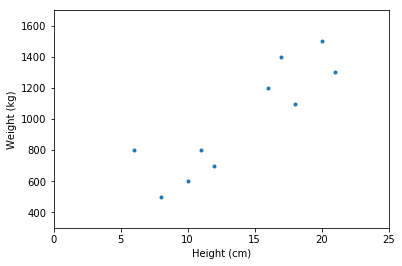

In [9]:
# Visualize our data!
f, ax = plt.subplots()
ax.plot(dat[:, 0], dat[:, 1], '.')
plt.xlabel('Height (cm)'); plt.xlim([0, 25]);
plt.ylabel('Weight (kg)'); plt.ylim([300, 1700]);

In [10]:
# Lets try a classification algorithm
#  If you're unfamiliar with KMeans, we'll come back to how it works later
from sklearn.cluster import KMeans
kmeans = KMeans(2).fit(dat)

In [11]:
# This gives us a label each data point, as to which cluster it belongs to
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int32)

In [12]:
# We can use these to split our dataset up into putative groupings
cl_1 = dat[kmeans.labels_ == 0]
cl_2 = dat[kmeans.labels_ == 1]

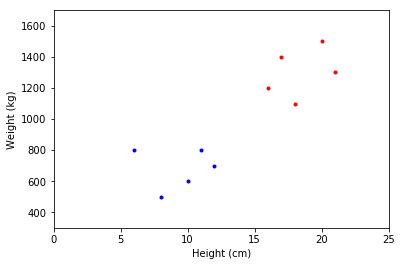

In [13]:
# And visualize the classification
f, ax = plt.subplots()
ax.plot(cl_1[:, 0], cl_1[:, 1], '.b')
ax.plot(cl_2[:, 0], cl_2[:, 1], '.r')
plt.xlabel('Height (cm)'); plt.xlim([0, 25]);
plt.ylabel('Weight (kg)'); plt.ylim([300, 1700]);

Evaluating classification, especially in unsupervised cases such as this (when we don't know the answer) is very much non-trivial. It's hard to know if there really are two groups here - or perhaps more, or fewer. We'll come back to how these analyses actually work and how to evaluate what you get out of them. 

<center><h1> Knowledge Discovery </h1></center>
<br>
<div class="alert alert-success">
Knowledge Discovery is the attempt to learn new things about the world from data. It can be done a many ways, including through classification and predictive analytics. We will explore various ways to learn new things about the world from data as we go through this class. 
</div>
<br>
<div class="alert alert-info">
An example of this, as discussed in lecture, is the Brain-SCANR, which analyses the existing literature in neuroscience to extract patterns, and make (potentially novel) hypotheses about the inter-relations of brain regions and functions: http://www.brainscanr.com/
</div>